In [ ]:
#Question:1

Run 1:
K-Means Accuracy: 0.559
EM Accuracy: 0.168
K-Means Adjusted Rand Index: 0.012957029867686714
EM Adjusted Rand Index: 0.4403680749487805

Run 2:
K-Means Accuracy: 0.428
EM Accuracy: 0.168
K-Means Adjusted Rand Index: 0.019789487535423395
EM Adjusted Rand Index: 0.4403680749487805

Run 3:
K-Means Accuracy: 0.428
EM Accuracy: 0.168
K-Means Adjusted Rand Index: 0.019795647479293087
EM Adjusted Rand Index: 0.4403680749487805

Run 4:
K-Means Accuracy: 0.435
EM Accuracy: 0.168
K-Means Adjusted Rand Index: 0.015952039708450435
EM Adjusted Rand Index: 0.4403680749487805

Run 5:
K-Means Accuracy: 0.565
EM Accuracy: 0.168
K-Means Adjusted Rand Index: 0.01594080726398213
EM Adjusted Rand Index: 0.4403680749487805

Run 6:
K-Means Accuracy: 0.438
EM Accuracy: 0.168
K-Means Adjusted Rand Index: 0.014428904653120115
EM Adjusted Rand Index: 0.4403680749487805

Run 7:
K-Means Accuracy: 0.435
EM Accuracy: 0.168
K-Means Adjusted Rand Index: 0.01594080726398213
EM Adjusted Rand Index: 0.440368074948

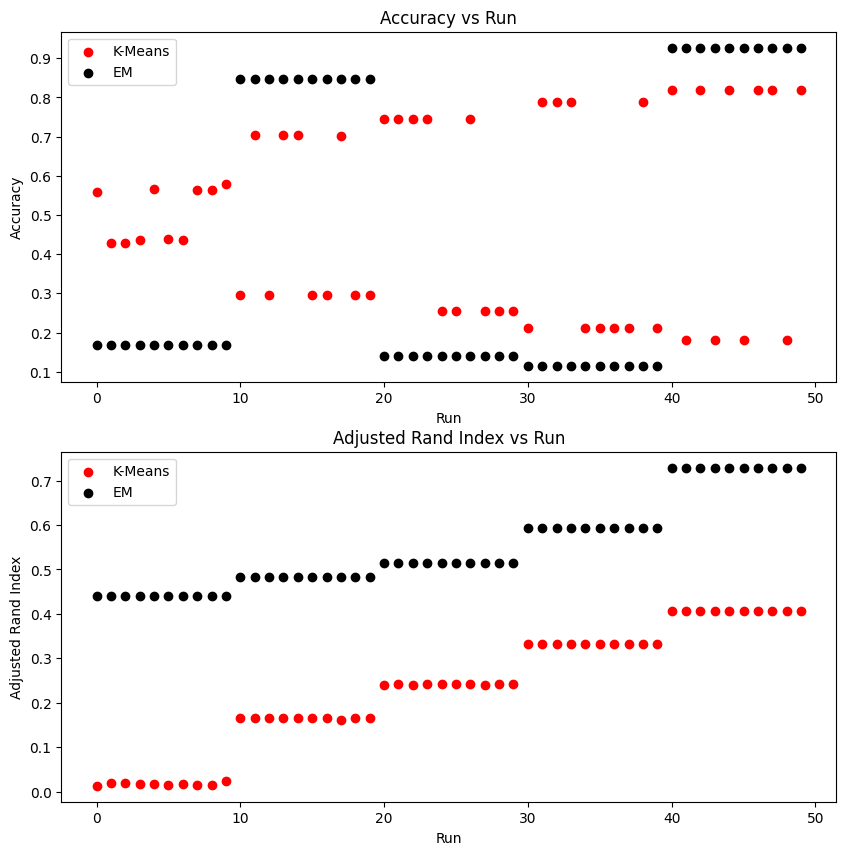

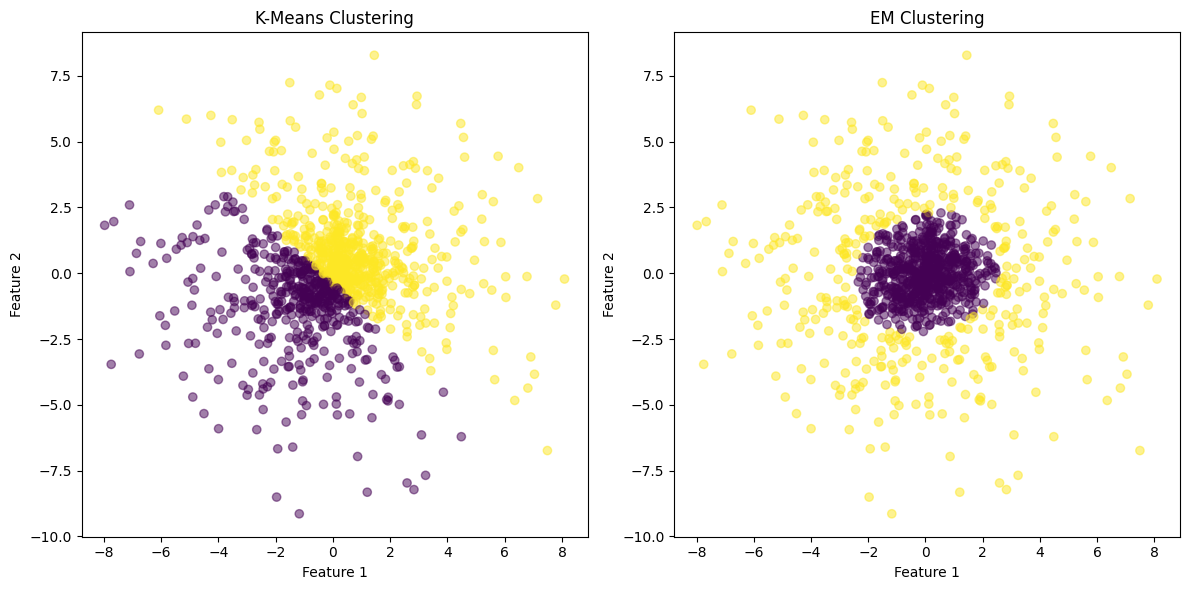

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, adjusted_rand_score
import warnings


np.random.seed(0)

def generate_dataset(sigma=3):
    X_Q = np.random.normal(loc=0, scale=sigma, size=(500, 2))
    y_Q = np.zeros(500)

    datasets = []
    for a in range(5):
        X_a = np.random.normal(loc=[a, 0], scale=1, size=(500, 2))
        y_a = np.ones(500)
        datasets.append((np.concatenate([X_a, X_Q]), np.concatenate([y_a, y_Q])))

    return datasets

def perform_clustering(X, y, n_clusters=2, n_runs=10):
    kmeans_accuracy_list = []
    em_accuracy_list = []
    kmeans_ari_list = []
    em_ari_list = []
    for i in range(n_runs):
        kmeans = KMeans(n_clusters=n_clusters, init='random', n_init=10).fit(X)
        em = GaussianMixture(n_components=n_clusters, random_state=0).fit(X)
        kmeans_clusters = kmeans.labels_
        em_clusters = em.predict(X)
        kmeans_accuracy = accuracy_score(y, kmeans_clusters)
        em_accuracy = accuracy_score(y, em_clusters)
        kmeans_ari = adjusted_rand_score(y, kmeans_clusters)
        em_ari = adjusted_rand_score(y, em_clusters)

        kmeans_accuracy_list.append(kmeans_accuracy)
        em_accuracy_list.append(em_accuracy)
        kmeans_ari_list.append(kmeans_ari)
        em_ari_list.append(em_ari)

        print(f"Run {i+1}:")
        print(f"K-Means Accuracy: {kmeans_accuracy}")
        print(f"EM Accuracy: {em_accuracy}")
        print(f"K-Means Adjusted Rand Index: {kmeans_ari}")
        print(f"EM Adjusted Rand Index: {em_ari}")
        print()

    return kmeans_accuracy_list, em_accuracy_list, kmeans_ari_list, em_ari_list


datasets = generate_dataset()


fig, axs = plt.subplots(2, 1, figsize=(10, 10))


kmeans_accuracy_values = []
em_accuracy_values = []
kmeans_ari_values = []
em_ari_values = []


for idx, (X, y) in enumerate(datasets):
    #print(f"Dataset {idx+1}:")

    kmeans_accuracy, em_accuracy, kmeans_ari, em_ari = perform_clustering(X, y, n_runs=10)
    kmeans_accuracy_values.extend(kmeans_accuracy)
    em_accuracy_values.extend(em_accuracy)
    kmeans_ari_values.extend(kmeans_ari)
    em_ari_values.extend(em_ari)

    if idx == 0:
        kmeans_clusters, em_clusters = KMeans(n_clusters=2, init='random', n_init=10).fit(X).labels_, GaussianMixture(n_components=2, random_state=0).fit(X).predict(X)
        plt.figure(figsize=(12, 6))
        plt.subplot(1, 2, 1)
        plt.scatter(X[:, 0], X[:, 1], c=kmeans_clusters, cmap='viridis', alpha=0.5)
        plt.title('K-Means Clustering')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')

        plt.subplot(1, 2, 2)
        plt.scatter(X[:, 0], X[:, 1], c=em_clusters, cmap='viridis', alpha=0.5)
        plt.title('EM Clustering')
        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')

axs[0].scatter(np.arange(50), kmeans_accuracy_values, color='red', label='K-Means')
axs[0].scatter(np.arange(50), em_accuracy_values, color='black', label='EM')
axs[0].set_xlabel('Run')
axs[0].set_ylabel('Accuracy')
axs[0].set_title('Accuracy vs Run')
axs[0].legend()

axs[1].scatter(np.arange(50), kmeans_ari_values, color='red', label='K-Means')
axs[1].scatter(np.arange(50), em_ari_values, color='black', label='EM')
axs[1].set_xlabel('Run')
axs[1].set_ylabel('Adjusted Rand Index')
axs[1].set_title('Adjusted Rand Index vs Run')
axs[1].legend()

plt.tight_layout()
plt.show()


In [ ]:
#questuon 2

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

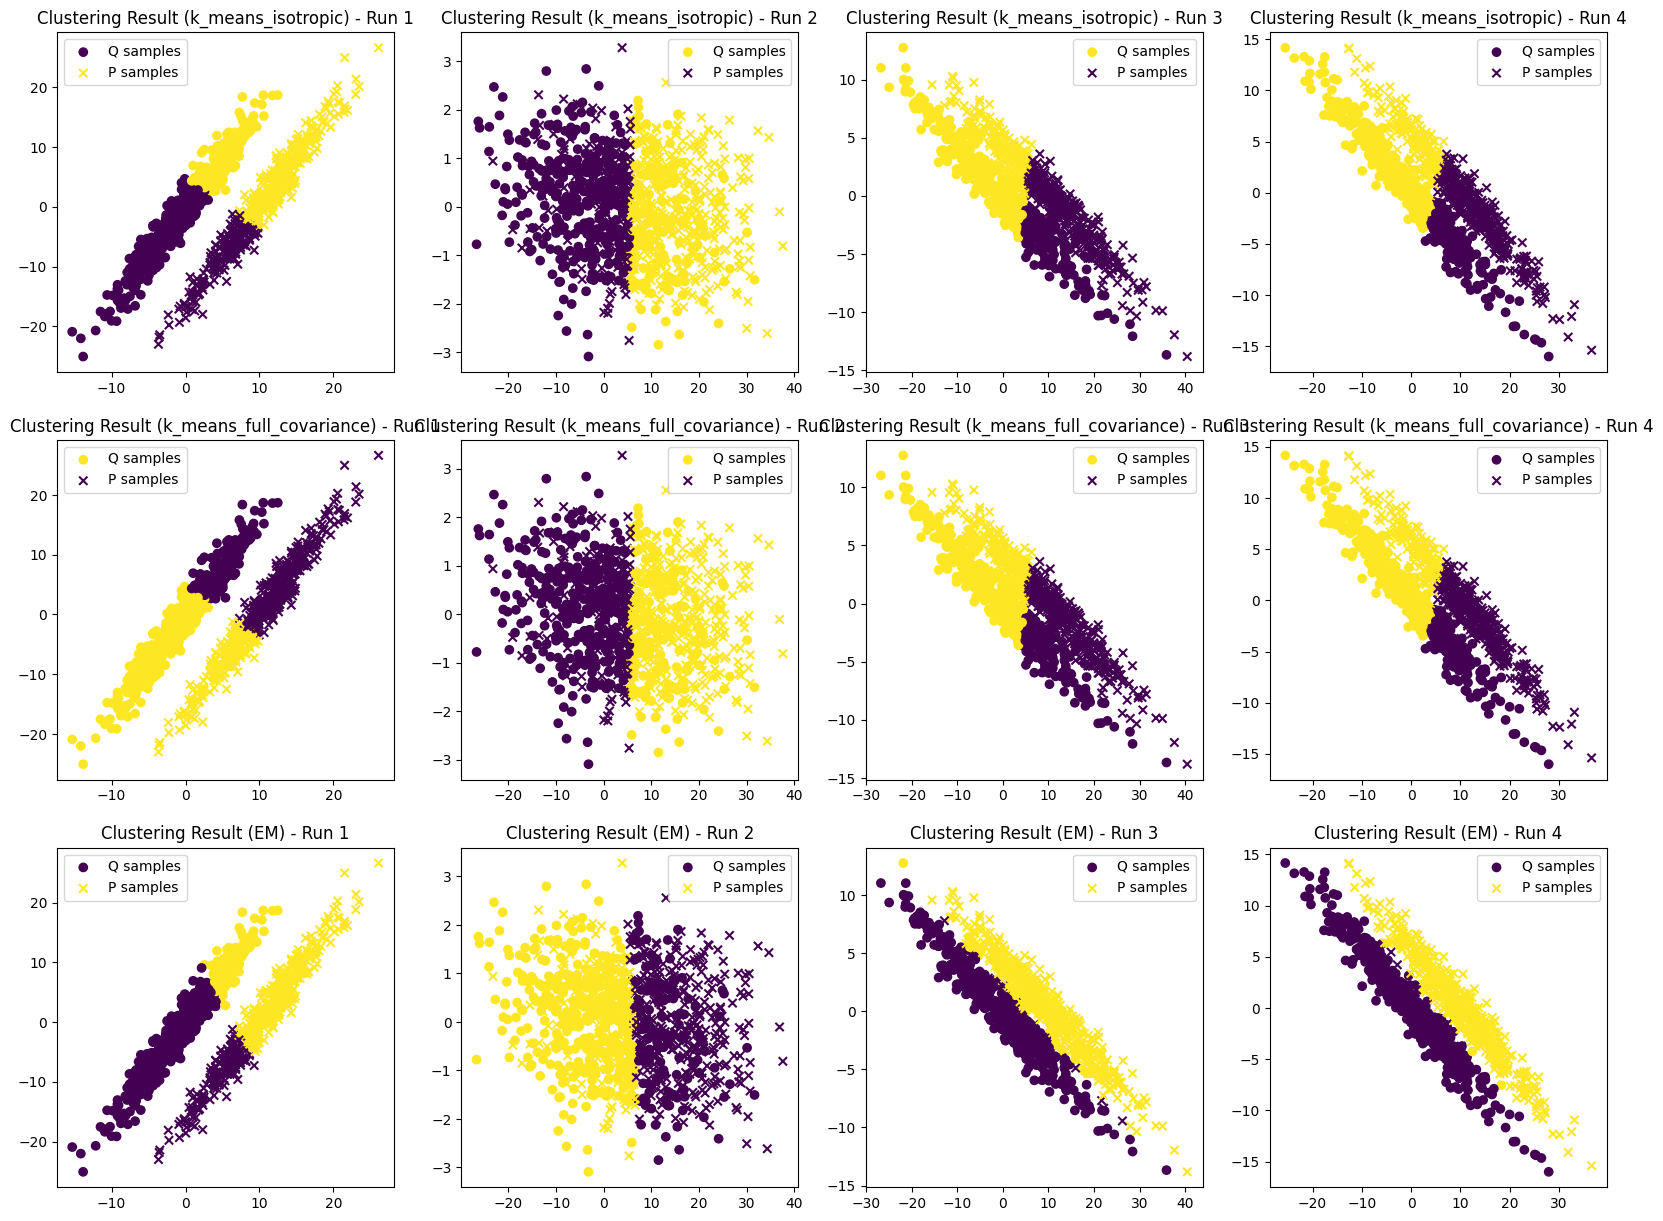

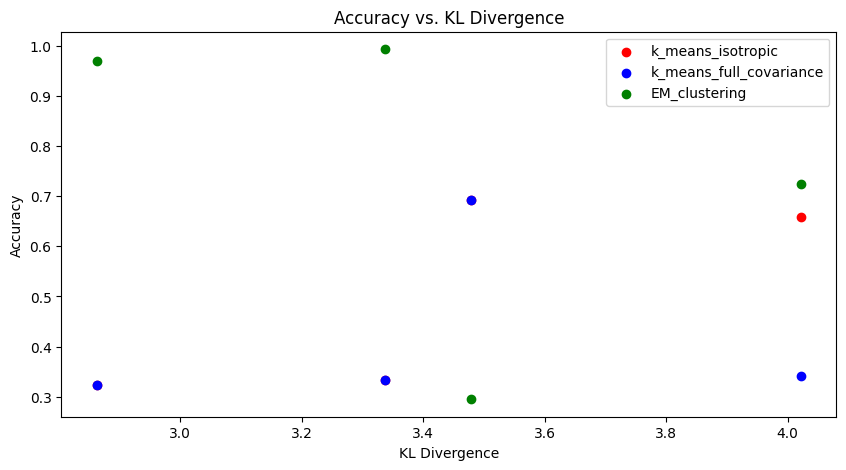

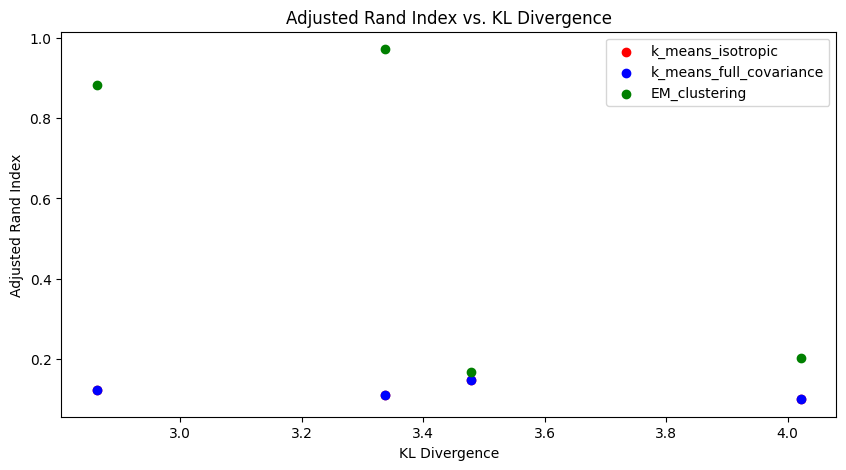

Run	KL Divergence	K-Means (Isotropic)	K-Means (Full Covariance)	EM Clustering
1	4.0219		0.6580			0.3420			0.7250
2	3.4780		0.6930			0.6930			0.2950
3	2.8624		0.3240			0.3240			0.9700
4	3.3370		0.3330			0.3330			0.9930
5	2.6867		0.3860			0.6140			0.5770
6	3.2263		0.3680			0.3680			0.3460
7	2.5808		0.6730			0.6710			0.2690
8	6.6513		0.2920			0.7080			0.7190
9	4.2279		0.3110			0.3120			0.9940
10	7.4791		0.5360			0.4640			0.5690


In [ ]:
import numpy as np
from scipy.stats import multivariate_normal
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt


num_runs_to_display = 4


num_runs = 10
accuracies = {'k_means_isotropic': [], 'k_means_full_covariance': [], 'EM_clustering': []}
adjusted_rand_indexes = {'k_means_isotropic': [], 'k_means_full_covariance': [], 'EM_clustering': []}
kl_divergences = []

fig, axs = plt.subplots(3, num_runs_to_display, figsize=(20, 15))

for run in range(num_runs):

    M = np.random.randn(2, 2)
    U, _, _ = np.linalg.svd(M)

    Sigma = np.dot(U, np.dot(np.array([[100, 0], [0, 1]]), U.T))
    Q_samples = np.random.multivariate_normal([0, 0], Sigma, 500)
    P_samples = np.random.multivariate_normal([10, 0], Sigma, 500)
    kl_divergence = np.mean(multivariate_normal.pdf(Q_samples, mean=[0, 0], cov=Sigma) / multivariate_normal.pdf(P_samples, mean=[10, 0], cov=Sigma))
    kl_divergences.append(kl_divergence)


    for i, (method, model) in enumerate([('k_means_isotropic', KMeans(n_clusters=2)),
                                         ('k_means_full_covariance', KMeans(n_clusters=2)),
                                         ('EM_clustering', GaussianMixture(n_components=2))]):
        model.fit(np.concatenate([Q_samples, P_samples]))
        cluster_labels = model.predict(np.concatenate([Q_samples, P_samples]))
        true_labels = np.concatenate([np.zeros(500), np.ones(500)])
        accuracy = np.mean(cluster_labels == true_labels)
        adjusted_rand_index = adjusted_rand_score(true_labels, cluster_labels)
        accuracies[method].append(accuracy)
        adjusted_rand_indexes[method].append(adjusted_rand_index)

        if run < num_runs_to_display:
            ax = axs[i, run]
            if method == 'EM_clustering':
                ax.scatter(Q_samples[:, 0], Q_samples[:, 1], c=cluster_labels[:500], cmap='viridis', marker='o', label='Q samples')
                ax.scatter(P_samples[:, 0], P_samples[:, 1], c=cluster_labels[500:], cmap='viridis', marker='x', label='P samples')
                ax.set_title(f'Clustering Result (EM) - Run {run+1}')
                ax.legend()
            else:
                ax.scatter(Q_samples[:, 0], Q_samples[:, 1], c=cluster_labels[:500], cmap='viridis', marker='o', label='Q samples')
                ax.scatter(P_samples[:, 0], P_samples[:, 1], c=cluster_labels[500:], cmap='viridis', marker='x', label='P samples')
                ax.set_title(f'Clustering Result ({method}) - Run {run+1}')
                ax.legend()


plt.figure(figsize=(10, 5))
plt.scatter(kl_divergences[:num_runs_to_display], accuracies['k_means_isotropic'][:num_runs_to_display], label='k_means_isotropic', color='red')
plt.scatter(kl_divergences[:num_runs_to_display], accuracies['k_means_full_covariance'][:num_runs_to_display], label='k_means_full_covariance', color='blue')
plt.scatter(kl_divergences[:num_runs_to_display], accuracies['EM_clustering'][:num_runs_to_display], label='EM_clustering', color='green')
plt.xlabel('KL Divergence')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. KL Divergence')
plt.legend()
plt.show()

plt.figure(figsize=(10, 5))
plt.scatter(kl_divergences[:num_runs_to_display], adjusted_rand_indexes['k_means_isotropic'][:num_runs_to_display], label='k_means_isotropic', color='red')
plt.scatter(kl_divergences[:num_runs_to_display], adjusted_rand_indexes['k_means_full_covariance'][:num_runs_to_display], label='k_means_full_covariance', color='blue')
plt.scatter(kl_divergences[:num_runs_to_display], adjusted_rand_indexes['EM_clustering'][:num_runs_to_display], label='EM_clustering', color='green')
plt.xlabel('KL Divergence')
plt.ylabel('Adjusted Rand Index')
plt.title('Adjusted Rand Index vs. KL Divergence')
plt.legend()
plt.show()


print("Run\tKL Divergence\tK-Means (Isotropic)\tK-Means (Full Covariance)\tEM Clustering")
for i in range(num_runs):
    print(f"{i+1}\t{kl_divergences[i]:.4f}\t\t{accuracies['k_means_isotropic'][i]:.4f}\t\t\t{accuracies['k_means_full_covariance'][i]:.4f}\t\t\t{accuracies['EM_clustering'][i]:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Run	KL Divergence	K-Means (Isotropic_accuracy)	K-Means (Full Covariance_accuracy)	EM Clustering_accuracy
1	6.5039		0.5770			0.4230			0.4020
2	2.1112		0.7060			0.7060			0.2790
3	6.4579		0.3060			0.6940			0.9820
4	2.7772		0.3680			0.3680			0.6560
5	3.6882		0.5350			0.5390			0.4220
6	5.1336		0.3840			0.3840			0.4180
7	3.8322		0.3310			0.3310			0.3510
8	2.7021		0.4120			0.5880			0.5840
9	4.0774		0.3090			0.6910			0.7190
10	4.1972		0.6140			0.3890			0.3470
Run	KL Divergence	K-Means (Isotropic_ari)	K-Means (Full Covariance_ari)	EM Clustering_ari
1	6.5039		0.0227			0.0227			0.0375
2	2.1112		0.1689			0.1689			0.1946
3	6.4579		0.1497			0.1497			0.9292
4	2.7772		0.0688			0.0688			0.0965
5	3.6882		0.0039			0.0051			0.0234
6	5.1336		0.0529			0.0529			0.0259
7	3.8322		0.1134			0.1134			0.0879
8	2.7021		0.0300			0.0300			0.0273
9	4.0774		0.1451			0.1451			0.1910
10	4.1972		0.0510			0.0483			0.0927


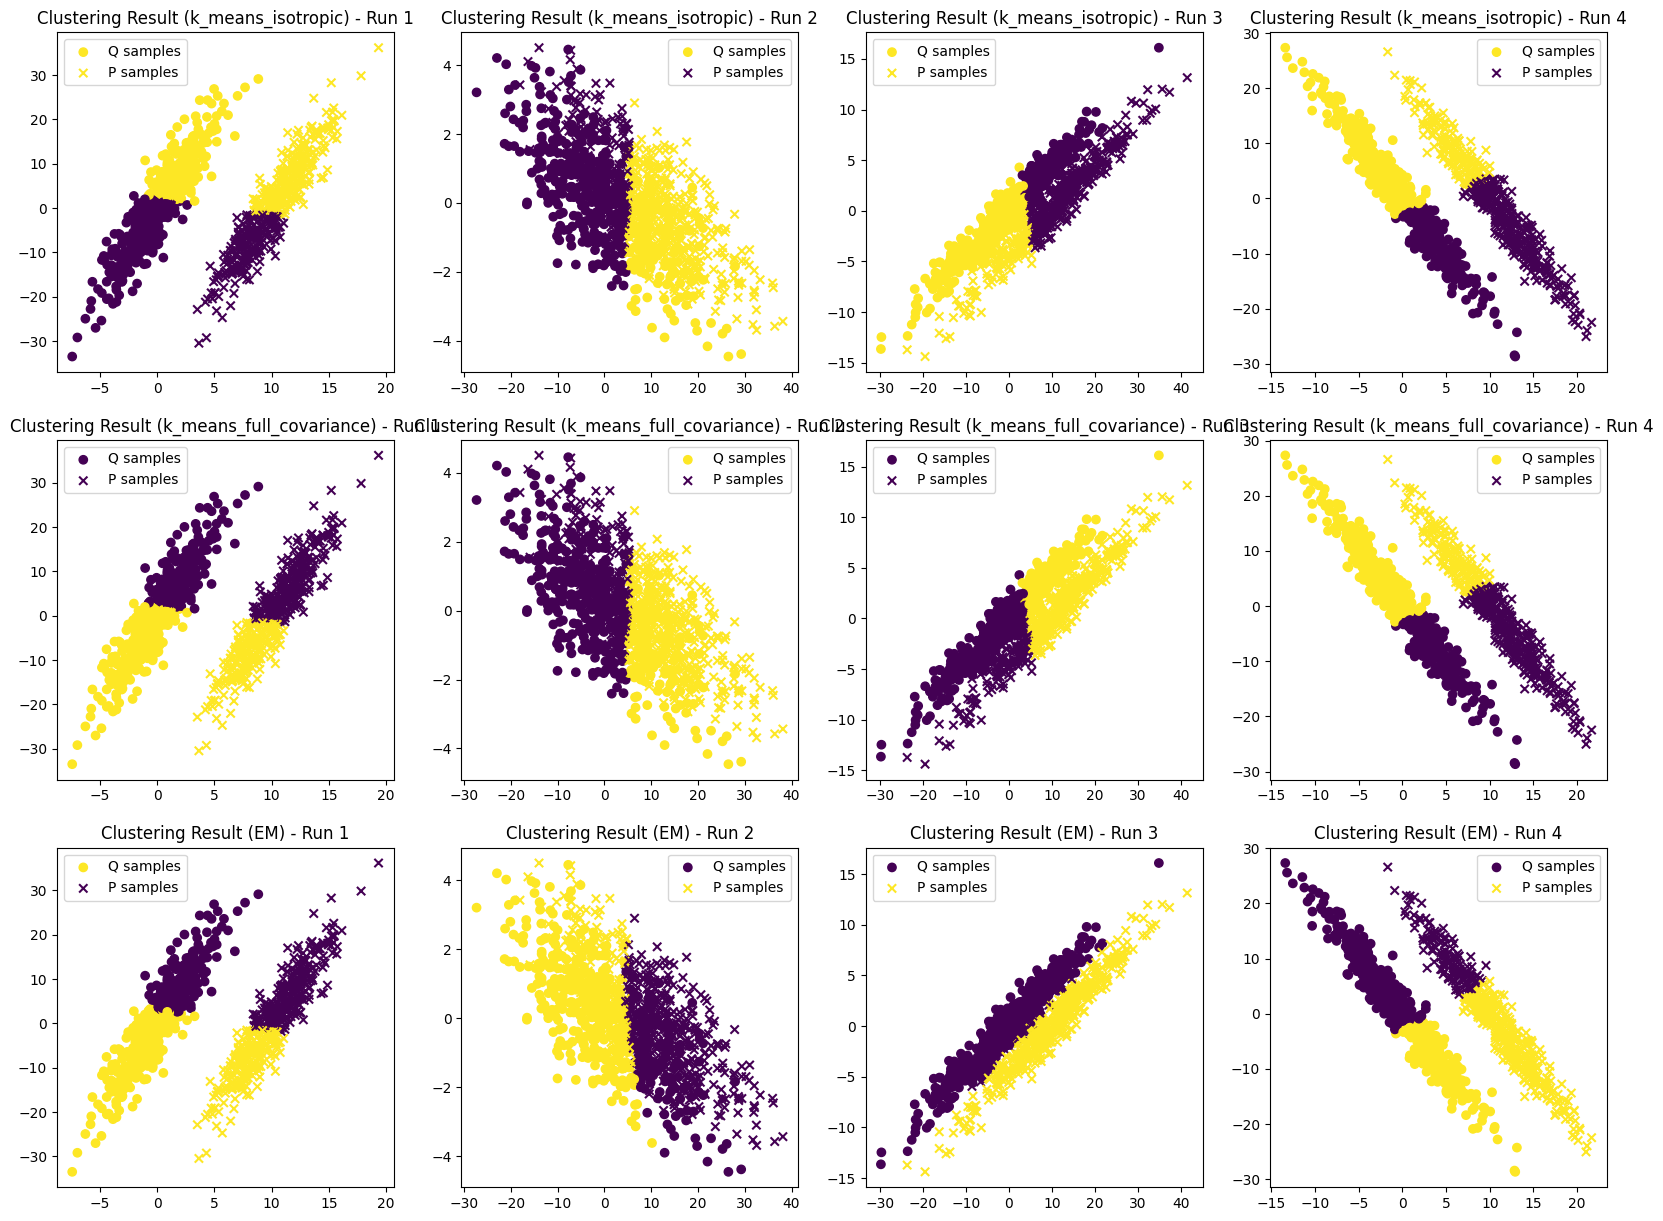

In [ ]:
import numpy as np
from scipy.stats import multivariate_normal
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt

# Repeat 10 times
num_runs = 10
accuracies = {'k_means_isotropic': [], 'k_means_full_covariance': [], 'EM_clustering': []}
adjusted_rand_indexes = {'k_means_isotropic': [], 'k_means_full_covariance': [], 'EM_clustering': []}
kl_divergences = []

fig, axs = plt.subplots(3, 4, figsize=(20, 15))

for run in range(num_runs):
    # Step 1: Generate random rotation matrix
    M = np.random.randn(2, 2)
    U, _, _ = np.linalg.svd(M)

    # Step 2: Compute covariance matrix, generate dataset, and compute KL divergence
    Sigma = np.dot(U, np.dot(np.array([[100, 0], [0, 1]]), U.T))
    Q_samples = np.random.multivariate_normal([0, 0], Sigma, 500)
    P_samples = np.random.multivariate_normal([10, 0], Sigma, 500)
    kl_divergence = np.mean(multivariate_normal.pdf(Q_samples, mean=[0, 0], cov=Sigma) / multivariate_normal.pdf(P_samples, mean=[10, 0], cov=Sigma))
    kl_divergences.append(kl_divergence)

    # Step 3: Run clustering algorithms
    for i, (method, model) in enumerate([('k_means_isotropic', KMeans(n_clusters=2)),
                                         ('k_means_full_covariance', KMeans(n_clusters=2)),
                                         ('EM_clustering', GaussianMixture(n_components=2))]):
        model.fit(np.concatenate([Q_samples, P_samples]))
        cluster_labels = model.predict(np.concatenate([Q_samples, P_samples]))
        true_labels = np.concatenate([np.zeros(500), np.ones(500)])
        accuracy = np.mean(cluster_labels == true_labels)
        adjusted_rand_index = adjusted_rand_score(true_labels, cluster_labels)
        accuracies[method].append(accuracy)
        adjusted_rand_indexes[method].append(adjusted_rand_index)

        ax = axs[i, run % 4]
        if run < 4:
            if method == 'EM_clustering':
                ax.scatter(Q_samples[:, 0], Q_samples[:, 1], c=cluster_labels[:500], cmap='viridis', marker='o', label='Q samples')
                ax.scatter(P_samples[:, 0], P_samples[:, 1], c=cluster_labels[500:], cmap='viridis', marker='x', label='P samples')
                ax.set_title(f'Clustering Result (EM) - Run {run+1}')
                ax.legend()
            else:
                ax.scatter(Q_samples[:, 0], Q_samples[:, 1], c=cluster_labels[:500], cmap='viridis', marker='o', label='Q samples')
                ax.scatter(P_samples[:, 0], P_samples[:, 1], c=cluster_labels[500:], cmap='viridis', marker='x', label='P samples')
                ax.set_title(f'Clustering Result ({method}) - Run {run+1}')
                ax.legend()

# Print results in a table
print("Run\tKL Divergence\tK-Means (Isotropic_accuracy)\tK-Means (Full Covariance_accuracy)\tEM Clustering_accuracy")
for i in range(num_runs):
    print(f"{i+1}\t{kl_divergences[i]:.4f}\t\t{accuracies['k_means_isotropic'][i]:.4f}\t\t\t{accuracies['k_means_full_covariance'][i]:.4f}\t\t\t{accuracies['EM_clustering'][i]:.4f}")
print("Run\tKL Divergence\tK-Means (Isotropic_ari)\tK-Means (Full Covariance_ari)\tEM Clustering_ari")
for i in range(num_runs):
    print(f"{i+1}\t{kl_divergences[i]:.4f}\t\t{adjusted_rand_indexes['k_means_isotropic'][i]:.4f}\t\t\t{adjusted_rand_indexes['k_means_full_covariance'][i]:.4f}\t\t\t{adjusted_rand_indexes['EM_clustering'][i]:.4f}")

plt.show()
